# Capstone 1: Chess

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
games = pd.read_csv('data/games.csv')

In [2]:
moves = games['moves']
match = moves.iloc[1]
match_list = np.array(match.split(' '))
match_array = match_list.reshape(-1,2)
rem_pieces = 32 - match.count('x')


In [3]:
def remaining_pieces(moves):
    '''
    Returns the number of pieces remaining on the board at the end of the match.
    Parameters
    ----------
    moves (string) = input move list

    Output
    ------
    number of remaining pieces (integer) 
    '''
    return 32 - moves.count('x')

In [4]:
games

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [5]:
games['eco_group'] = games['opening_eco'].apply(lambda x: x[0])

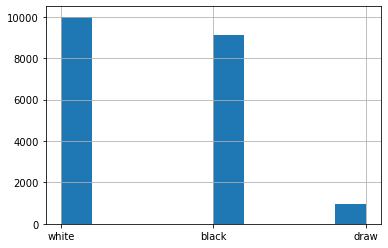

In [6]:
# scatter = games['turns','white_rating','black_rating','opening_ply']
# pd.plotting.scatter_matrix(scatter)
games['winner'].hist()

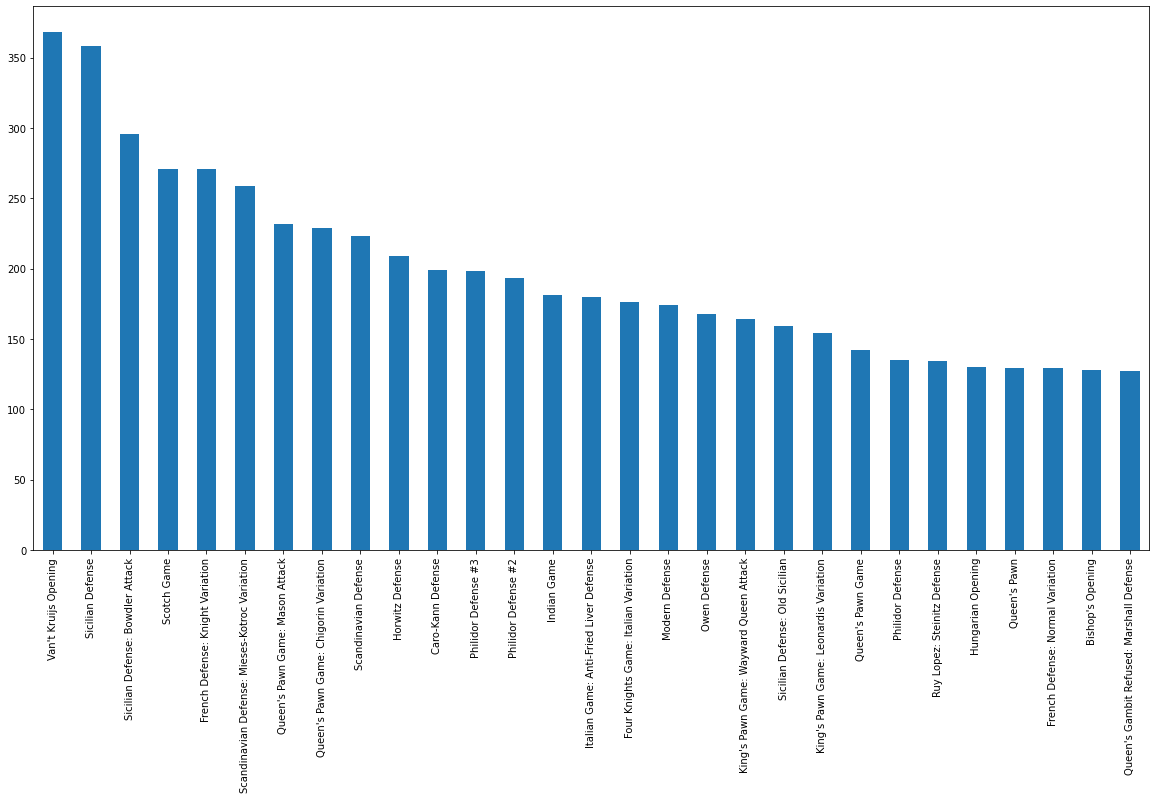

In [7]:
fig,ax = plt.subplots(figsize=(20,10))
ax = games['opening_name'].value_counts()[:29].plot.bar()

In [8]:
openings = games['opening_name'].value_counts()
vant = games[games['opening_name'] == openings.keys()[0]]
sicilian = games[games['opening_name'] == openings.keys()[1]]

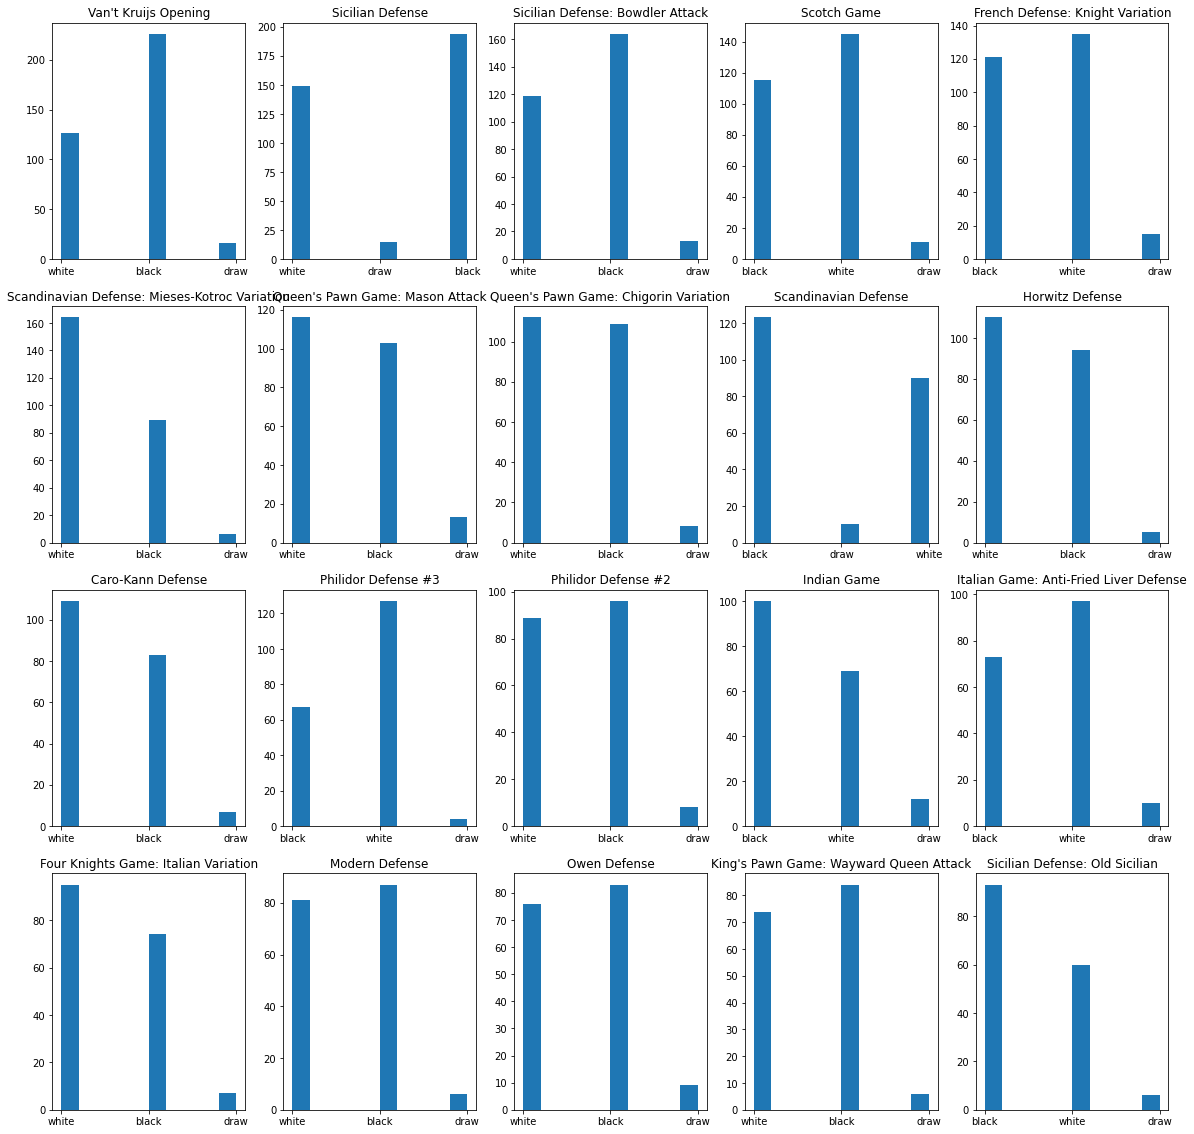

In [9]:
bins = ['white','black','draw']
fig, ax = plt.subplots(4,5,figsize=(20,20))
ax = ax.flatten()
for i in range(20):
    ax[i].hist(games[games['opening_name'] == openings.keys()[i]]['winner'])
    ax[i].set_title(openings.keys()[i])

Text(0.5, 1.0, 'Sicilian Defense: Bowdler Attack')

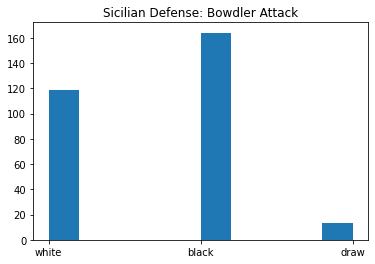

In [10]:
plt.hist(games[games['opening_name'] == openings.keys()[2]]['winner'])
plt.title(openings.keys()[2])

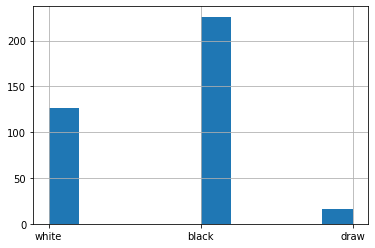

In [11]:
vant['winner'].hist()

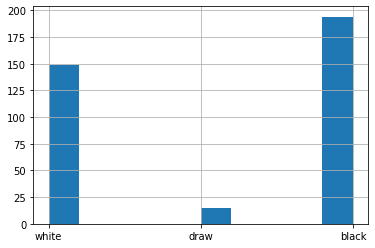

In [12]:
sicilian['winner'].hist()

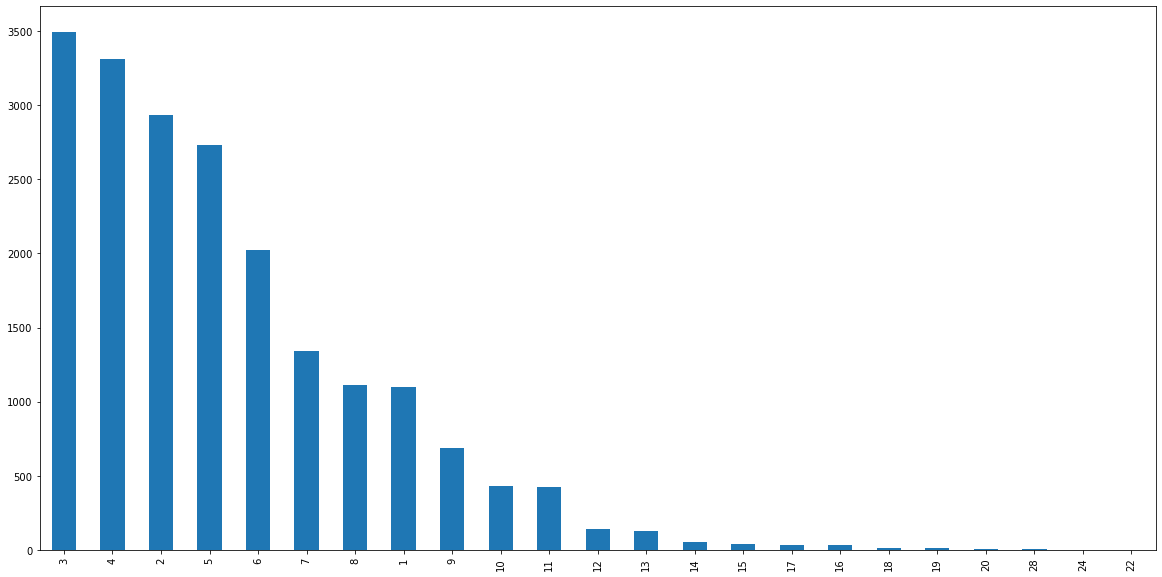

In [13]:
fig,ax = plt.subplots(figsize=(20,10))
ax = games['opening_ply'].value_counts()[:29].plot.bar()

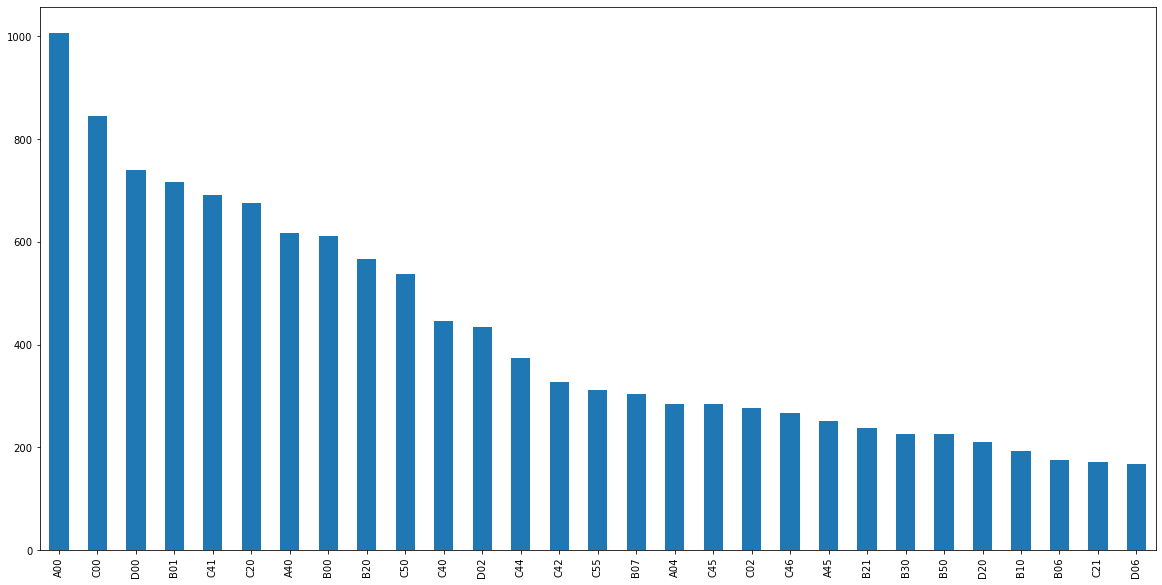

In [14]:
fig,ax = plt.subplots(figsize=(20,10))
ax = games['opening_eco'].value_counts()[:29].plot.bar()

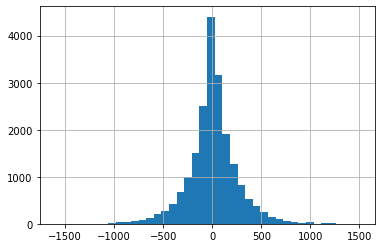

In [15]:
(games['white_rating']-games['black_rating']).hist(bins=40)

In [16]:
games['rating_differential']= games['white_rating']-games['black_rating']

In [17]:
games.groupby(['opening_name','winner']).count()

id  rated  created_at  last_move_at  \
opening_name                    winner                                        
Alekhine Defense                black   21     21          21            21   
                                draw     2      2           2             2   
                                white   23     23          23            23   
Alekhine Defense #2             black    1      1           1             1   
                                draw     1      1           1             1   
...                                     ..    ...         ...           ...   
Zukertort Opening: The Walrus   white    1      1           1             1   
Zukertort Opening: Vos Gambit   black    1      1           1             1   
                                draw     1      1           1             1   
                                white    1      1           1             1   
Zukertort Opening: Wade Defense black    1      1           1             1   

                                        turns  victory_status  increment_code  \
opening_name                    winner                                          
Alekhine Defense                black      21              21              21   
                                draw        2               2               2   
                                white      23              23              23   
Alekhine Defense #2             black       1               1               1   
                                draw        1               1               1   
...                                       ...             ...             ...   
Zukertort Opening: The Walrus   white       1               1               1   
Zukertort Opening: Vos Gambit   black       1               1               1   
                                draw        1               1               1   
                                white       1               1               1   
Zukertort Opening: Wade Defense black       1               1               1   

                                        white_id  white_rating  black_id  \
opening_name                    winner                                     
Alekhine Defense                black         21            21        21   
                                draw           2             2         2   
                                white         23            23        23   
Alekhine Defense #2             black          1             1         1   
                                draw           1             1         1   
...                                          ...           ...       ...   
Zukertort Opening: The Walrus   white          1             1         1   
Zukertort Opening: Vos Gambit   black          1             1         1   
                                draw           1             1         1   
                                white          1             1         1   
Zukertort Opening: Wade Defense black          1             1         1   

                                        black_rating  moves  opening_eco  \
opening_name                    winner                                     
Alekhine Defense                black             21     21           21   
                                draw               2      2            2   
                                white             23     23           23   
Alekhine Defense #2             black              1      1            1   
                                draw               1      1            1   
...                                              ...    ...          ...   
Zukertort Opening: The Walrus   white              1      1            1   
Zukertort Opening: Vos Gambit   black              1      1            1   
                                draw               1      1            1   
                                white              1      1            1   
Zukertort Opening: Wade Defense black              1     

In [18]:
draws = games[games['winner']=='draw']
draws[draws['rating_differential'] > 0].count()

id                     466
rated                  466
created_at             466
last_move_at           466
turns                  466
victory_status         466
winner                 466
increment_code         466
white_id               466
white_rating           466
black_id               466
black_rating           466
moves                  466
opening_eco            466
opening_name           466
opening_ply            466
eco_group              466
rating_differential    466
dtype: int64

In [19]:
draws[draws['rating_differential'] == 0].count()

id                     13
rated                  13
created_at             13
last_move_at           13
turns                  13
victory_status         13
winner                 13
increment_code         13
white_id               13
white_rating           13
black_id               13
black_rating           13
moves                  13
opening_eco            13
opening_name           13
opening_ply            13
eco_group              13
rating_differential    13
dtype: int64

In [20]:
openings_grp = games.groupby('opening_name')

In [21]:
ratings = games[['white_rating','black_rating','winner']]
ratings['diff'] = ratings['white_rating']-ratings['black_rating']

# for i in ratings.index:
#     if ratings['diff'].iloc[i] > 0 and ratings['winner'].iloc[i] == 'white':
#         ratings['upset'].iloc[i] = 'expected'
#     elif ratings['winner'].iloc[i] == 'draw':
#         ratings['upset'].iloc[i] = 'unknown'
#     elif ratings['diff'].iloc[i] < 0 and ratings.iloc[i]['winner'] == 'black':
#         ratings['upset'].iloc[i] = 'expected'
#     else:
#         ratings['upset'].iloc[i] = 'upset'
# ratings['upset'].hist()

ratings['expected_winner'] = np.where(ratings['white_rating'] >= ratings['black_rating'],'white','black')
games['expected_winner'] = np.where(games['white_rating'] >= games['black_rating'],'white','black')
ratings['upset'] = np.where(ratings['winner']==ratings['expected_winner'],'expected','upset')
games['upset'] = np.where(games['winner']==games['expected_winner'],'expected','upset')

for i in ratings.index:
    if ratings['winner'].iloc[i] == 'draw':
        ratings['upset'].iloc[i] = 'draw'

for i in games.index:
    if games['winner'].iloc[i] == 'draw':
        games['upset'].iloc[i] = 'draw'

/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

expected    12447
upset        6661
draw          950
Name: upset, dtype: int64

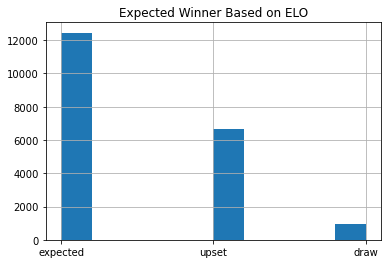

In [22]:
ratings['upset'].hist()
plt.title('Expected Winner Based on ELO')
ratings['upset'].value_counts()

In [23]:
upsets = ratings['upset'].value_counts()

In [24]:
raw = ratings['upset'].value_counts().values
raw/raw.sum()

array([0.6205504 , 0.33208695, 0.04736265])

In [25]:
pd.array

<function pandas.core.construction.array(data: Sequence[object], dtype: Union[str, numpy.dtype, pandas.core.dtypes.base.ExtensionDtype, NoneType] = None, copy: bool = True) -> pandas.core.dtypes.generic.ABCExtensionArray>

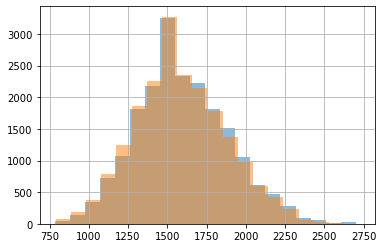

In [26]:
games['white_rating'].hist(bins=20,alpha=0.5)
games['black_rating'].hist(bins=20,alpha=0.5)

In [27]:
rating_arr = games['white_rating'].to_numpy()

In [28]:
rating_arr = np.append(rating_arr,games['black_rating'].to_numpy())

(array([1.140e+02, 2.940e+02, 7.480e+02, 1.515e+03, 2.371e+03, 3.702e+03,
        4.480e+03, 6.552e+03, 4.684e+03, 4.402e+03, 3.587e+03, 2.845e+03,
        1.994e+03, 1.170e+03, 8.890e+02, 4.820e+02, 1.480e+02, 8.400e+01,
        5.300e+01, 2.000e+00]),
 array([ 784.  ,  880.95,  977.9 , 1074.85, 1171.8 , 1268.75, 1365.7 ,
        1462.65, 1559.6 , 1656.55, 1753.5 , 1850.45, 1947.4 , 2044.35,
        2141.3 , 2238.25, 2335.2 , 2432.15, 2529.1 , 2626.05, 2723.  ]),
 <a list of 20 Patch objects>)

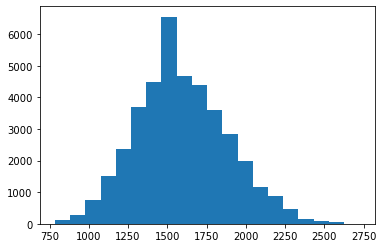

In [29]:
plt.hist(rating_arr,bins=20)

In [30]:
bins = np.arange(750,2750,250)

In [31]:
high_elo_w = games[games['white_rating'] >= 2500]
high_elo_w['white_id'].unique()

array(['lance5500', 'lexisvar', 'shahoviy_komentator', 'blitzbullet',
       'king-bullet', 'le_truand', 'chess-stat', 'justicebot',
       'teatime007', 'chesspirate421'], dtype=object)

In [32]:
high_elo_b = games[games['black_rating'] >= 2500]
high_elo = pd.concat([high_elo_b,high_elo_w])
high_elo

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,eco_group,rating_differential,expected_winner,upset
4473,rAO6oybn,False,1.480830e+12,1.480830e+12,1,outoftime,white,5+5,ranchowangdu,1500,justicebot,2723,e4,B00,King's Pawn,1,B,-1223,black,upset
4797,83vhI5GR,False,1.470150e+12,1.470160e+12,33,resign,black,60+60,nomadre,1884,chess-stat,2500,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f3 Bg7 Be...,B78,Sicilian Defense: Dragon Variation | Yugoslav...,19,B,-616,black,expected
5373,zkk33R0Z,False,1.496890e+12,1.496890e+12,40,mate,black,15+0,burks,1016,lance5500,2621,Nc3 c5 Nf3 Nc6 Nb5 Nf6 c4 g6 Ng5 Bg7 d3 O-O Bf...,A00,Van Geet Opening,1,A,-1605,black,expected
5374,5gtNuMhB,False,1.496880e+12,1.496880e+12,48,mate,black,10+0,burks,1016,lance5500,2621,Nf3 Nf6 d4 g6 Bg5 Bg7 Nc3 d5 Qd3 Bf5 Qb5+ Nc6 ...,A48,Torre Attack,5,A,-1605,black,expected
5671,jvx4GoJV,True,1.503060e+12,1.503060e+12,122,outoftime,black,15+0,justlikemusic,2145,avill050,2588,d4 Nf6 c4 g6 g3 Bg7 Bg2 O-O Nf3 c5 O-O d6 Nbd2...,E64,King's Indian Defense: Fianchetto Variation | ...,12,E,-443,black,expected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,8WxfSxC9,False,1.503611e+12,1.503614e+12,107,resign,white,20+10,chesspirate421,2500,avorton,2205,e4 c5 Nf3 e6 g3 Nc6 Bg2 Nf6 Qe2 e5 c3 d6 d3 Be...,B40,Sicilian Defense: French Variation,4,B,295,white,expected
16641,ttaaZI0J,False,1.482910e+12,1.482910e+12,79,resign,white,8+0,lance5500,2613,jhonthoth,1904,d4 e6 c4 d5 Nc3 Nf6 Bg5 Be7 e3 h6 Bh4 Nbd7 Nf3...,D53,Queen's Gambit Declined: 4.Bg5 Be7,8,D,709,white,expected
18328,JVV78yDG,False,1.500555e+12,1.500556e+12,29,outoftime,white,10+25,lance5500,2621,artem555,1555,e4 c6 d4 d5 Nd2 dxe4 Nxe4 Nf6 Nxf6+ exf6 c3 Be...,B15,Caro-Kann Defense: Tartakower Variation,10,B,1066,white,expected
19016,upN6B2c0,False,1.503525e+12,1.503527e+12,69,resign,white,10+15,lance5500,2621,chessmageddon,2206,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 a6 Bc4 e5 Nf...,B90,Sicilian Defense: Najdorf | Lipnitsky Attack,11,B,415,white,expected


In [33]:
games.sort_values(by='opening_ply',ascending=False)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,eco_group,rating_differential,expected_winner,upset
4475,9bIIqx54,False,1.480830e+12,1.480840e+12,32,outoftime,black,5+5,ranchowangdu,1500,boseayan,2021,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O Be7 c3 O-O Re...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,C,-521,black,expected
19412,YaQWFwbu,True,1.502744e+12,1.502745e+12,61,resign,white,10+0,balikoevsd,1857,craciun05,1916,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O Be7 Re1 b5 Bb...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,C,-59,black,upset
17900,Ms2THNEC,True,1.504184e+12,1.504184e+12,45,resign,black,3+8,bratancb,2000,bosspotato,2289,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O Be7 Re1 b5 Bb...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,C,-289,black,expected
16443,BjplwwJ1,True,1.481225e+12,1.481226e+12,34,resign,black,10+0,ramin741,1835,bassem1963,1733,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O b5 Bb3 Be7 Re...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,C,102,white,upset
18853,58AwByNw,True,1.475188e+12,1.475189e+12,65,outoftime,white,10+5,teddster,2168,axim188,2050,e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 h5...,B19,Caro-Kann Defense: Classical Variation | Lobr...,24,B,118,white,expected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,xnm3oh0t,True,1.487460e+12,1.487460e+12,76,resign,white,11+0,alexandre_silva,1477,kevchod,1560,e3 e5 Bc4 Nf6 d4 Nc6 d5 Nb4 c3 Na6 Bxa6 bxa6 c...,A00,Van't Kruijs Opening,1,A,-83,black,upset
3094,HIZAAqDg,True,1.487460e+12,1.487460e+12,61,resign,white,11+0,alexandre_silva,1472,kevchod,1564,d3 d5 e3 e5 Nf3 Nc6 e4 dxe4 dxe4 Qxd1+ Kxd1 Bd...,A00,Mieses Opening,1,A,-92,black,upset
3096,XViv0SVq,True,1.504160e+12,1.504160e+12,59,outoftime,white,5+5,alichess68,1567,dankersoll,1108,g3 b6 Bg2 c6 b4 Nf6 b5 Bb7 bxc6 Nxc6 Bb2 e6 Nf...,A00,Hungarian Opening,1,A,459,white,expected
3099,A6wCNlRk,True,1.503870e+12,1.503870e+12,163,mate,white,6+5,alichess68,1616,srbronka,1404,g3 e6 Bg2 g6 d3 Bg7 Nf3 d5 O-O c6 Nc3 Ne7 Bg5 ...,A00,Hungarian Opening,1,A,212,white,expected


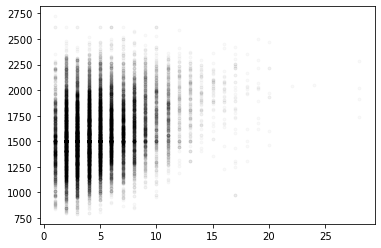

In [34]:
turns = games.sort_values(by='turns')
plt.scatter(turns['opening_ply'],turns['black_rating'],color='k',alpha=0.025,marker='.')

In [35]:
def plot_ply(df, ax):
    plies = df.groupby('opening_ply').mean()[['white_rating','black_rating']]
    ax.plot(plies.index,plies[['white_rating','black_rating']])

In [36]:
plies = games.groupby('opening_ply').mean()[['white_rating','black_rating']]

In [37]:
plies.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 22, 24, 28],
           dtype='int64', name='opening_ply')

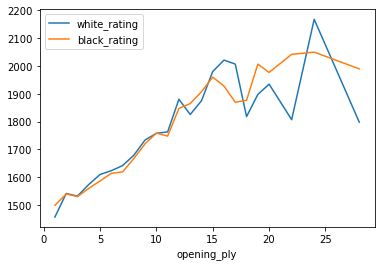

In [38]:
plies.plot()

In [39]:
ply = []
groups = ['A','B','C','D','E']
for i in range(5):
    ply.append(games[games['eco_group'] == groups[i]])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


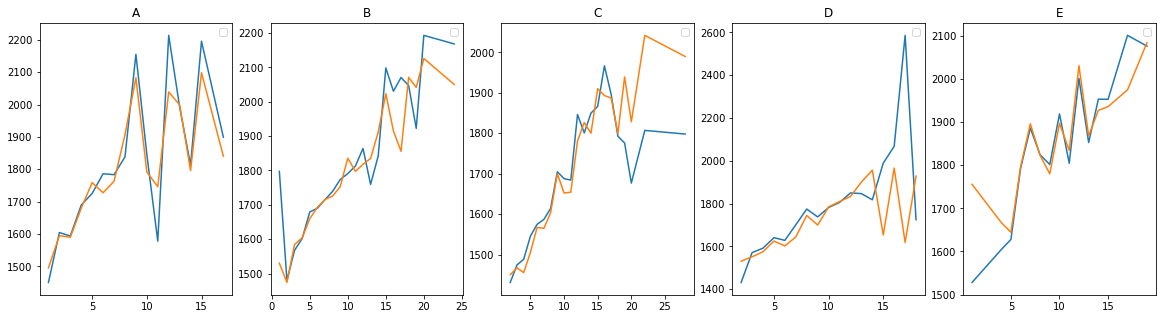

In [40]:
# Switch axes possibly possibly explain trend
fig, ax = plt.subplots(1,5,figsize=(20,5))
for i in range(5):
    plot_ply(ply[i], ax[i])
    ax[i].set_title(groups[i])
    ax[i].legend()


In [41]:
rated = games[games['rated']==True]
unrated = games[games['rated']==False]
users = games['white_id'].value_counts()[games['white_id'].value_counts()>1].keys()

In [42]:
games['average_rating'] = (games['white_rating']+games['black_rating'])/2

In [43]:
games['rating_diff_abs'] = games['rating_differential'].apply(lambda x: abs(x))

In [44]:
# Sort games dataframe into sections based on ELO in range(750,2750,250)
games['elo_range'] = pd.cut(games['average_rating'],range(800,2501,100))
elo_groups = games.groupby('elo_range')
elo_group_names = elo_groups.groups
elo_keys = list(elo_group_names.keys())
elo_dfs = []
for i in range(len(elo_keys)):
    elo_dfs.append(elo_groups.get_group(elo_keys[i]))

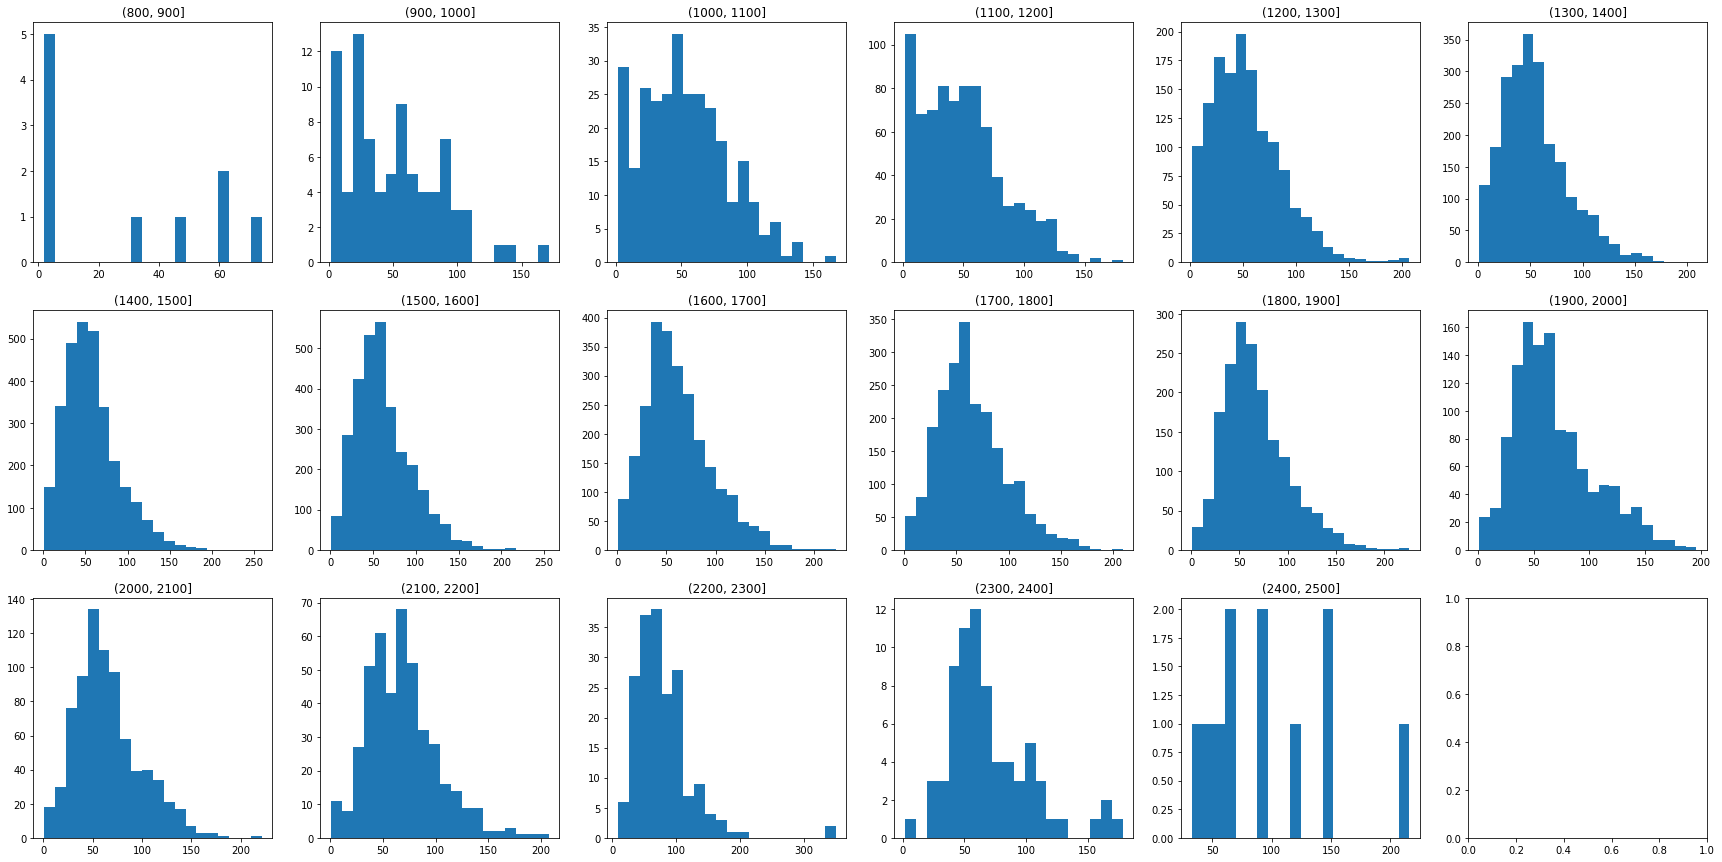

In [45]:
# compare length of games and opening ply across elo ranges
fig, ax = plt.subplots(3,6, figsize = (30,15))
ax = ax.flatten()
for i in range(len(elo_dfs)):
    elo_range = elo_dfs[i]
    ax[i].hist(elo_range['turns'],bins=20)
    ax[i].set_title(elo_keys[i])

/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


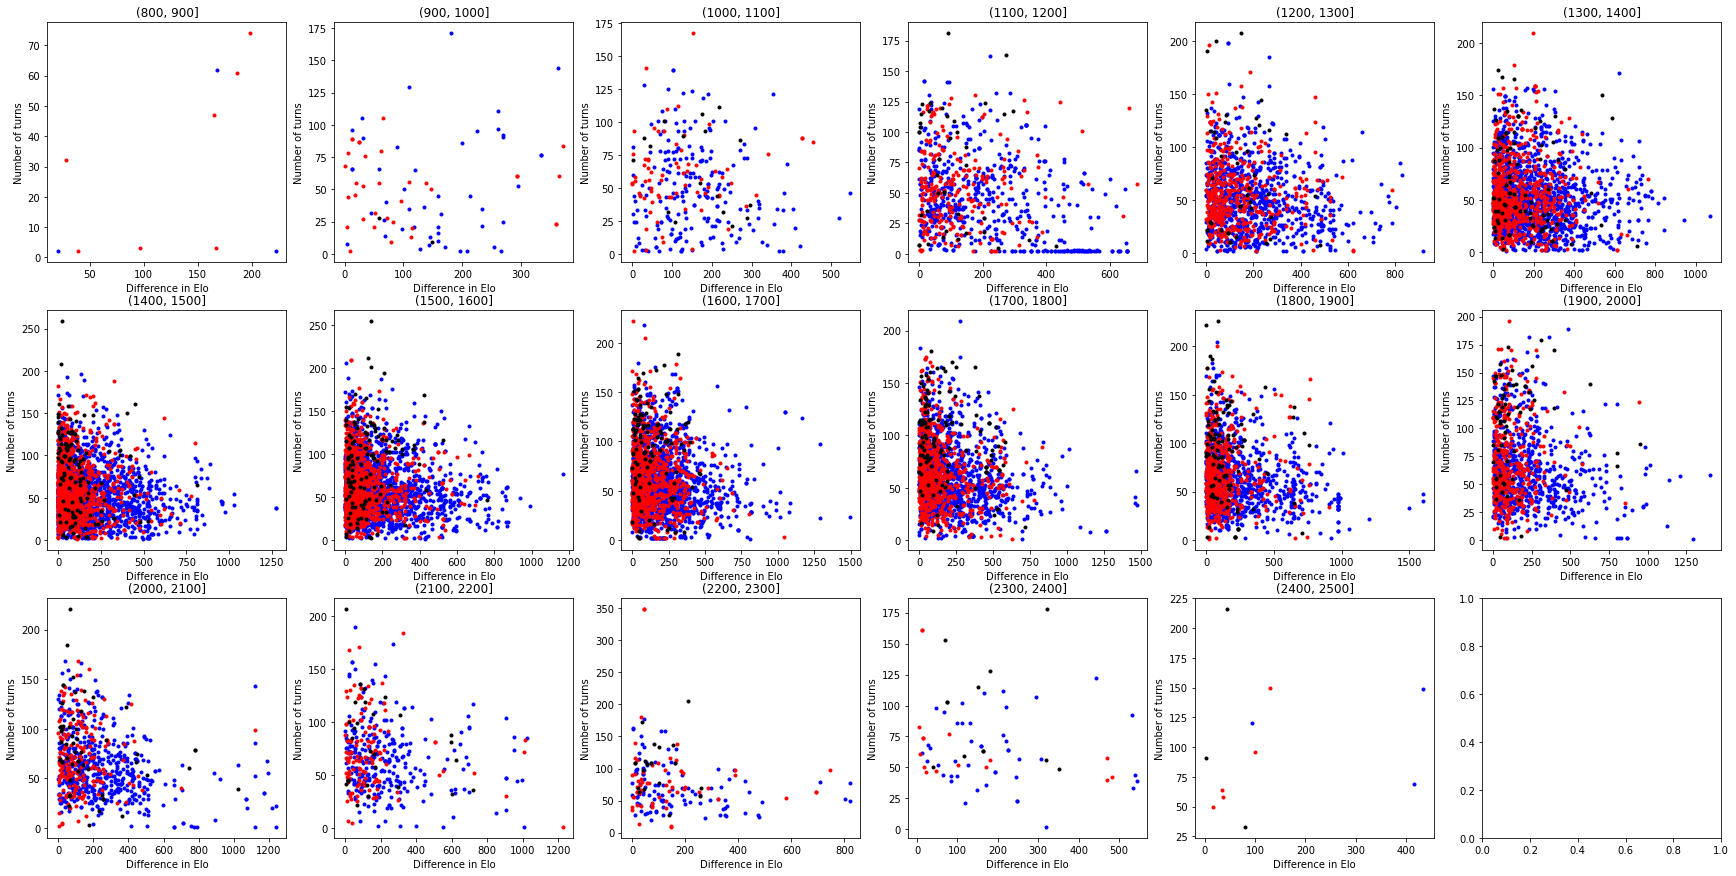

In [46]:
fig, ax = plt.subplots(3,6, figsize=(30,15))
ax = ax.flatten()
for i in range(len(elo_dfs)):
    elo_range = elo_dfs[i]
    expected = elo_range[games['upset'] == 'expected']
    upset = elo_range[games['upset'] == 'upset']
    draw = elo_range[games['upset'] == 'draw']
    ax[i].scatter(expected['rating_diff_abs'],expected['turns'],marker='.', color = 'b')
    ax[i].scatter(upset['rating_diff_abs'],upset['turns'],marker='.', color = 'r')
    ax[i].scatter(draw['rating_diff_abs'],draw['turns'],marker='.', color = 'k')
    ax[i].set_xlabel('Difference in Elo')
    ax[i].set_ylabel('Number of turns')
    ax[i].set_title(elo_keys[i])

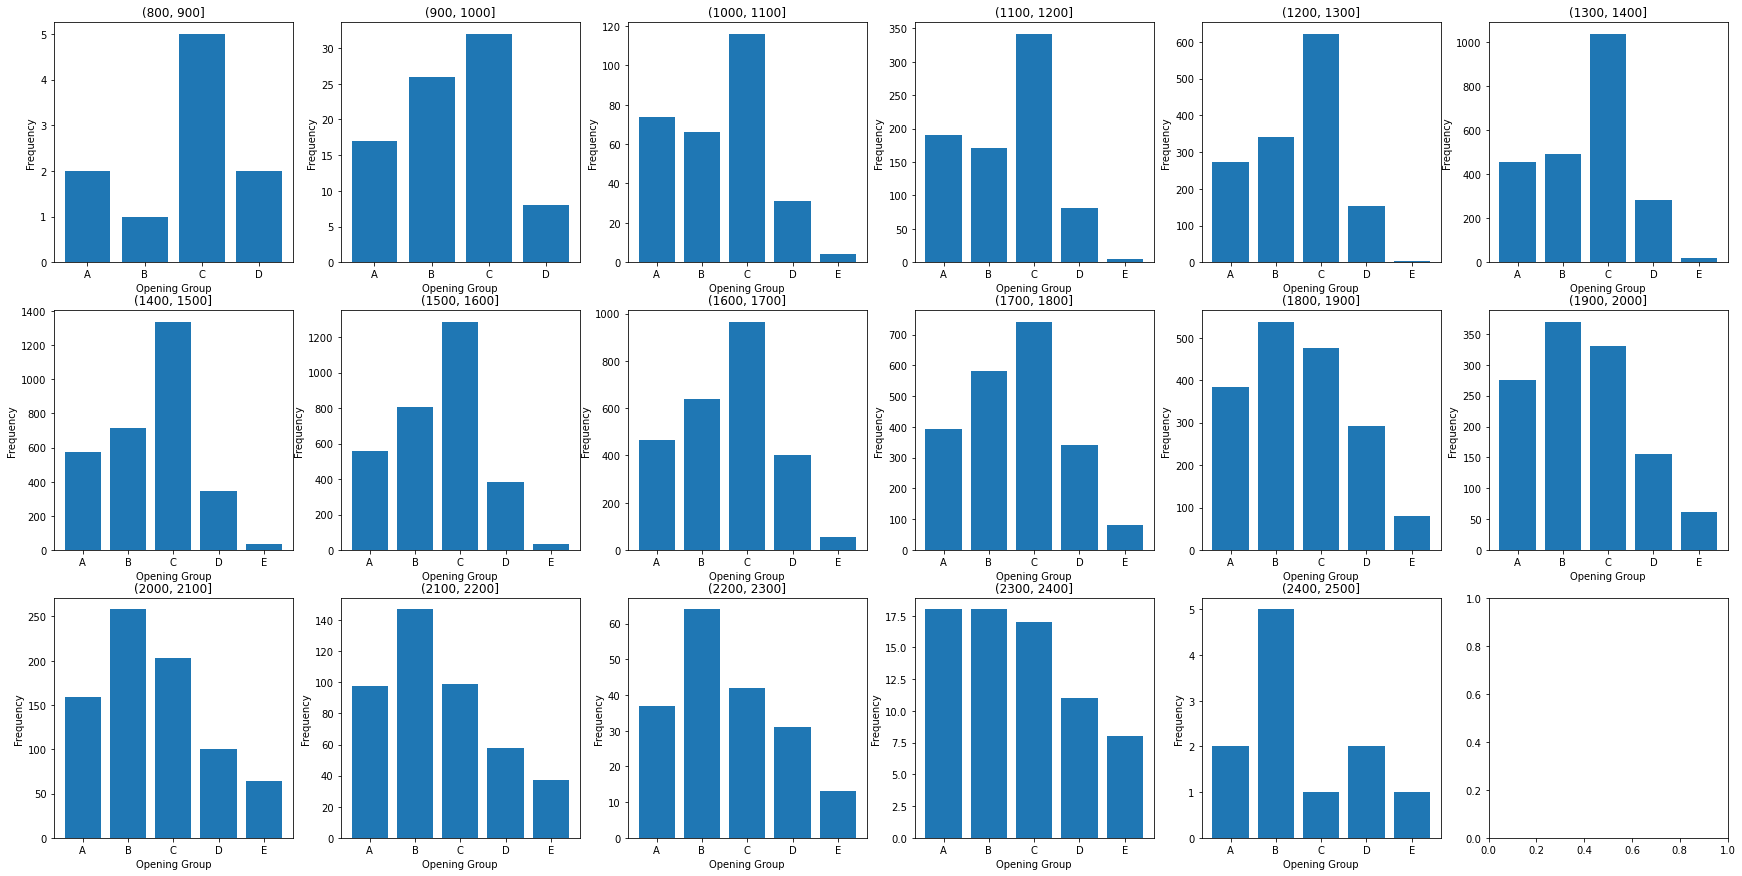

In [47]:
fig, ax = plt.subplots(3,6, figsize=(30,15))
ax = ax.flatten()
for i in range(len(elo_dfs)):
    counts = elo_dfs[i]['eco_group'].value_counts().sort_index()
    ax[i].bar(counts.index,counts.values)
    ax[i].set_xlabel('Opening Group')
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(elo_keys[i])

In [48]:
len(ratings)

20058